In [2]:
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [3]:
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")
words = ["king", "queen", "prince", "princess", "cat", "dog", "cow","goat","apple", "banana","mango","papaya", "car", "bus","india", "france", "paris", "delhi", "london",]


In [4]:
vectors=[model_word2vec[word] for word in words if word in model_word2vec]
vector_word2vec = np.array(vectors)
print("total selected words: ", len(words))
print(vector_word2vec.shape)
print(vector_word2vec[0])

total selected words:  19
(19, 300)
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46

In [5]:
vector = [model_glove[word] for word in words if word in model_glove]
vector_glove = np.array(vector)
print("total selected words: ", len(words))
print(vector_glove.shape)
print(vector_glove[0])  

total selected words:  19
(19, 100)
[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0

In [6]:
tsne=TSNE(n_components=2, random_state=42, perplexity=10,learning_rate=200)
tsne_coordinates=tsne.fit_transform(vector_word2vec)
print("original shape: ", vector_word2vec.shape)
print("transformed shape: ", tsne_coordinates.shape)
print("1st 5 tsne coordinates: ", tsne_coordinates[:5])
print("1st 5 words tsne coordinates: ", vector_word2vec[:5])

original shape:  (19, 300)
transformed shape:  (19, 2)
1st 5 tsne coordinates:  [[117.68916   27.403172]
 [ 66.33202   61.07964 ]
 [ 62.521313 134.50935 ]
 [121.70301  108.74829 ]
 [-41.94591  -81.49772 ]]
1st 5 words tsne coordinates:  [[ 0.12597656  0.02978516  0.00860596 ... -0.0859375   0.09130859
   0.25195312]
 [ 0.00524902 -0.14355469 -0.06933594 ... -0.046875    0.16308594
   0.15429688]
 [ 0.12988281  0.22363281 -0.3046875  ... -0.01135254  0.18457031
   0.29882812]
 [-0.10009766 -0.09326172 -0.22265625 ...  0.14648438  0.17871094
   0.08544922]
 [ 0.0123291   0.20410156 -0.28515625 ...  0.4921875  -0.27539062
   0.05615234]]


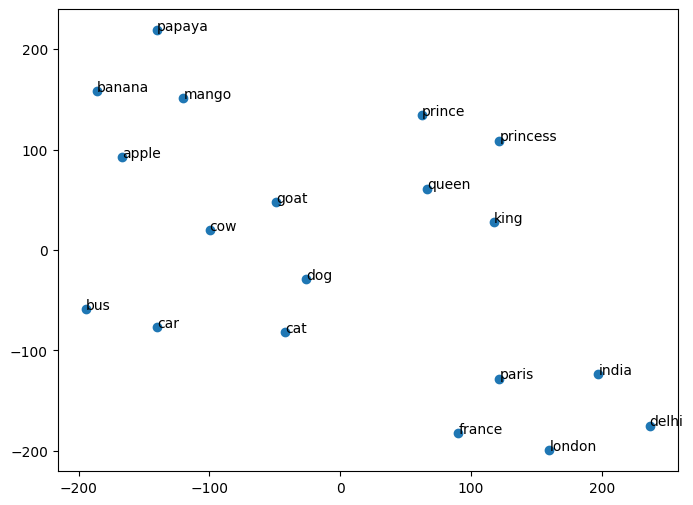

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()

In [10]:
tsne_glove_coordinates=tsne.fit_transform(vector_glove)
print("original shape: ", vector_glove.shape)
print("transformed shape: ", tsne_glove_coordinates.shape)
print("1st 5 tsne coordinates: ", tsne_glove_coordinates[:5])
print("1st 5 words tsne coordinates: ", vector_glove[:5])

original shape:  (19, 100)
transformed shape:  (19, 2)
1st 5 tsne coordinates:  [[  81.968216  153.45749 ]
 [ 226.049     209.6769  ]
 [  63.244194  300.01852 ]
 [ 222.73247   352.50626 ]
 [  87.63631  -200.92805 ]]
1st 5 words tsne coordinates:  [[-3.2307e-01 -8.7616e-01  2.1977e-01  2.5268e-01  2.2976e-01  7.3880e-01
  -3.7954e-01 -3.5307e-01 -8.4369e-01 -1.1113e+00 -3.0266e-01  3.3178e-01
  -2.5113e-01  3.0448e-01 -7.7491e-02 -8.9815e-01  9.2496e-02 -1.1407e+00
  -5.8324e-01  6.6869e-01 -2.3122e-01 -9.5855e-01  2.8262e-01 -7.8848e-02
   7.5315e-01  2.6584e-01  3.4220e-01 -3.3949e-01  9.5608e-01  6.5641e-02
   4.5747e-01  3.9835e-01  5.7965e-01  3.9267e-01 -2.1851e-01  5.8795e-01
  -5.5999e-01  6.3368e-01 -4.3983e-02 -6.8731e-01 -3.7841e-01  3.8026e-01
   6.1641e-01 -8.8269e-01 -1.2346e-01 -3.7928e-01 -3.8318e-01  2.3868e-01
   6.6850e-01 -4.3321e-01 -1.1065e-01  8.1723e-02  1.1569e+00  7.8958e-01
  -2.1223e-01 -2.3211e+00 -6.7806e-01  4.4561e-01  6.5707e-01  1.0450e-01
   4.6217e-01

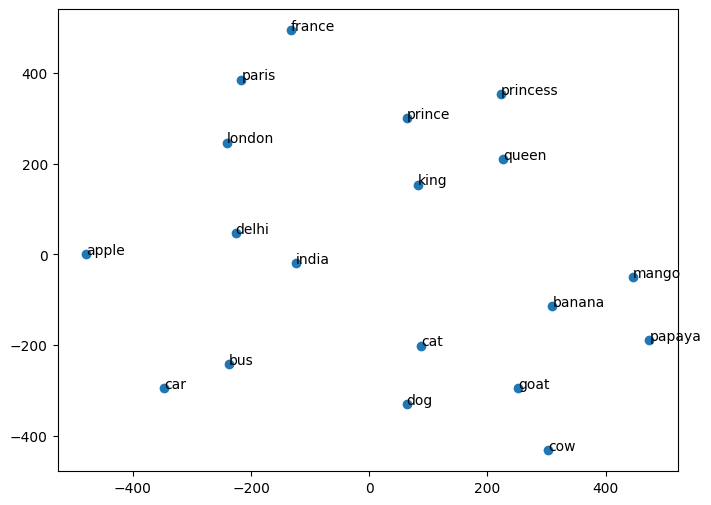

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_glove_coordinates[:,0], tsne_glove_coordinates[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_glove_coordinates[i,0], tsne_glove_coordinates[i,1]))

plt.show()